### Exercise 1

IMPORTANT CAVEAT: According to my (albeit very limited) economics knowledge (combined with the fact that the signal looks literally like white noise after a single differential), stock markets have upward trends but only on the yearly scale and anything in between can be considered more or less volatile, and marketwatch.com only provides up to a single year worth of trading days (251 days); so with very basic ML tools and skills of a bachelor's student, getting the general slope correct in the prediction values is (to me) already a big win :')


Edit: After some research, I was able to find this: The Efficient Market Hypothesis (per Burton G. Malkiel, Princeton University) states that it is more less impossible to beat the market by prediction (ML by extension), because markets basically run on human feelings if you think about it.

Otherwise, if we only look at residual values of the model, then apart from the 2 outliers, the residual seems to display white noise behavior within a very small range, and its distribution against the normal fits extremely well, which can be considered satisfactory.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.api import qqplot
import pandas as pd


z_score=3 #equal to 3-sigma i.e. ~99% of the data
len_segment=201 #80% of 251
reference=z_score/np.sqrt(len_segment)

(251,)
Index set as days from certain date for less error messages from console


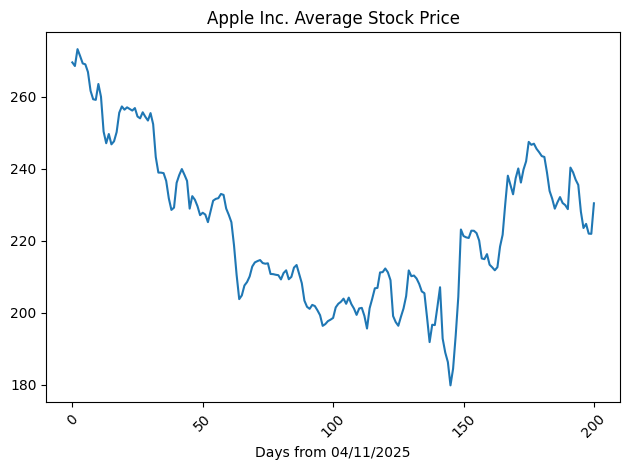

In [239]:
stockdf = pd.read_csv("STOCK_US_XNAS_AAPL.csv")

stockdf["Average"] = (stockdf["High"] + stockdf["Low"])/2
stockdf = stockdf["Average"] # Take only the Average prices for each date
print(stockdf.shape)

segment = stockdf[0:len_segment]
test_segment = stockdf[len_segment+1:-1]

print("Index set as days from certain date for less error messages from console")
fig, ax = plt.subplots()
x = np.arange(len(segment))
ax.plot(x, segment.values)
n_ticks = 5
pos = np.linspace(0, len(segment) - 1, n_ticks, dtype=int)
ax.set_xticks(pos)
ax.set_xticklabels([str(segment.index[i]) for i in pos], rotation=45)
ax.set_title("Apple Inc. Average Stock Price")
ax.set_xlabel("Days from 04/11/2025")
plt.tight_layout()
plt.show()



In [241]:
print("\nLet us find the d (differencing) value, the first one that goes below 0.05 limit:")
result = adfuller(segment)
print('p-value (0.05): ', result[1])
result = adfuller(np.diff(segment))
print('1st order diff p-value (0.05): ', result[1])


print("1st order diff p-value is already less than 0.05, so choose d as 1")


Let us find the d (differencing) value, the first one that goes below 0.05 limit:
p-value (0.05):  0.15037544666052
1st order diff p-value (0.05):  5.090500713672285e-11
1st order diff p-value is already less than 0.05, so choose d as 1


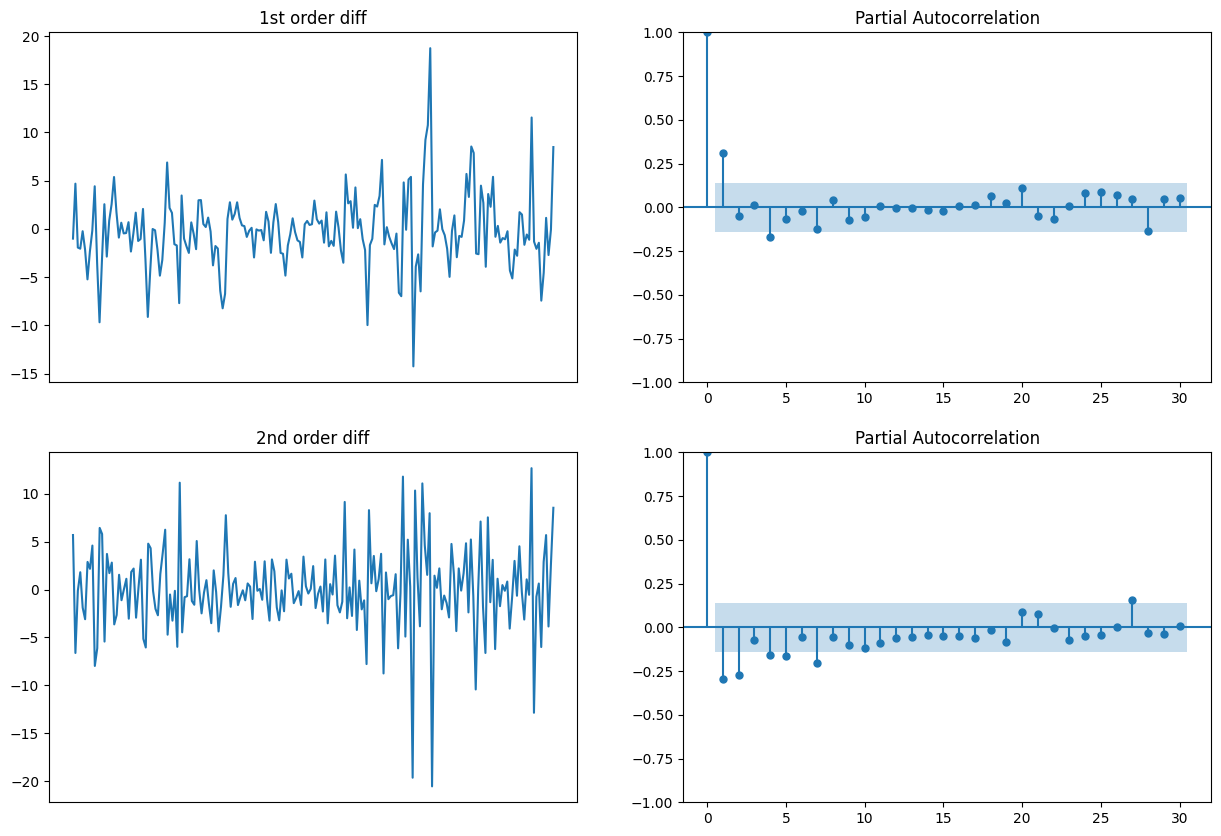

For both plots, the first lag is the most important, so p = 1


In [242]:
#CHOOSING P 
#Look at partial autocorrelation plots of orders of differences
#Choose lag with consistently the largest difference
fig, sub = plt.subplots(2, 2)
sub = sub.flatten()

fig.set_figheight(10)
fig.set_figwidth(15)

ax1 = sub[0]
ax2 = sub[1]
ax3 = sub[2]
ax4 = sub[3]

ax1.set_title("1st order diff")
ax1.plot(segment.diff())
ax1.set_xticks([])
sm.graphics.tsa.plot_pacf(segment.diff().dropna(), lags=30, ax=ax2)

ax3.set_title("2nd order diff")
ax3.plot(segment.diff().diff())
ax3.set_xticks([])
sm.graphics.tsa.plot_pacf(segment.diff().diff().dropna(), lags=30, ax=ax4)

plt.show()

print("For both plots, the first lag is the most important, so p = 1")

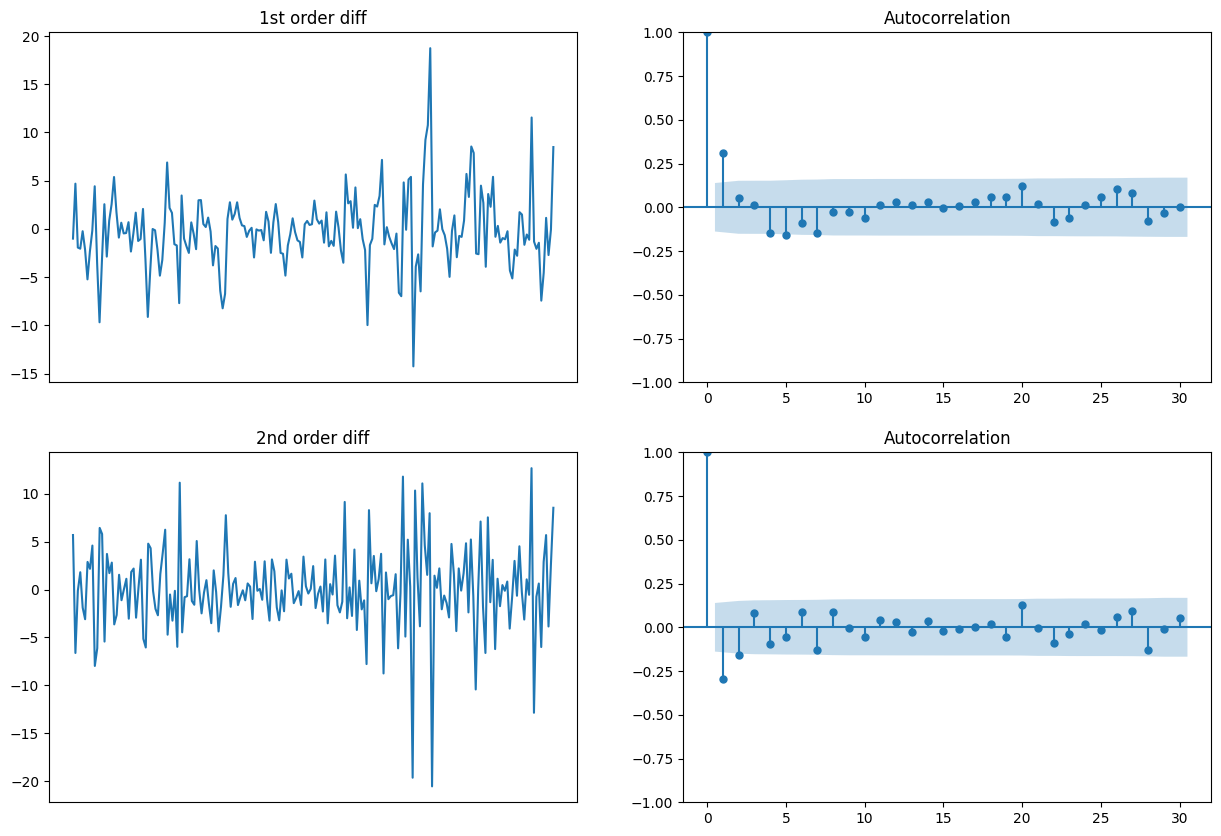

2nd order difference has more 'crossings', so we choose q = 2


In [243]:
#CHOOSING Q
#Look at autocorrelation plots of orders of differences
#Choose number the same as the order of autocorrelation plot with the most "crossings" with x-axis between points
fig, sub = plt.subplots(2, 2)
sub = sub.flatten()

fig.set_figheight(10)
fig.set_figwidth(15)

ax1 = sub[0]
ax2 = sub[1]
ax3 = sub[2]
ax4 = sub[3]



ax1.set_title("1st order diff")
ax1.plot(segment.diff())
ax1.set_xticks([])
sm.graphics.tsa.plot_acf(segment.diff().dropna(), lags=30, ax=ax2)

ax3.set_title("2nd order diff")
ax3.plot(segment.diff().diff())
ax3.set_xticks([])
sm.graphics.tsa.plot_acf(segment.diff().diff().dropna(), lags=30, ax=ax4)
plt.show()


print("2nd order difference has more 'crossings', so we choose q = 2")

In [ ]:
# Create model, seasonal order parameters obtained from ChatGPT based on what data was provided.
arma_model=ARIMA(segment,order=(1,1,2),seasonal_order=(0,1,1,5)).fit()

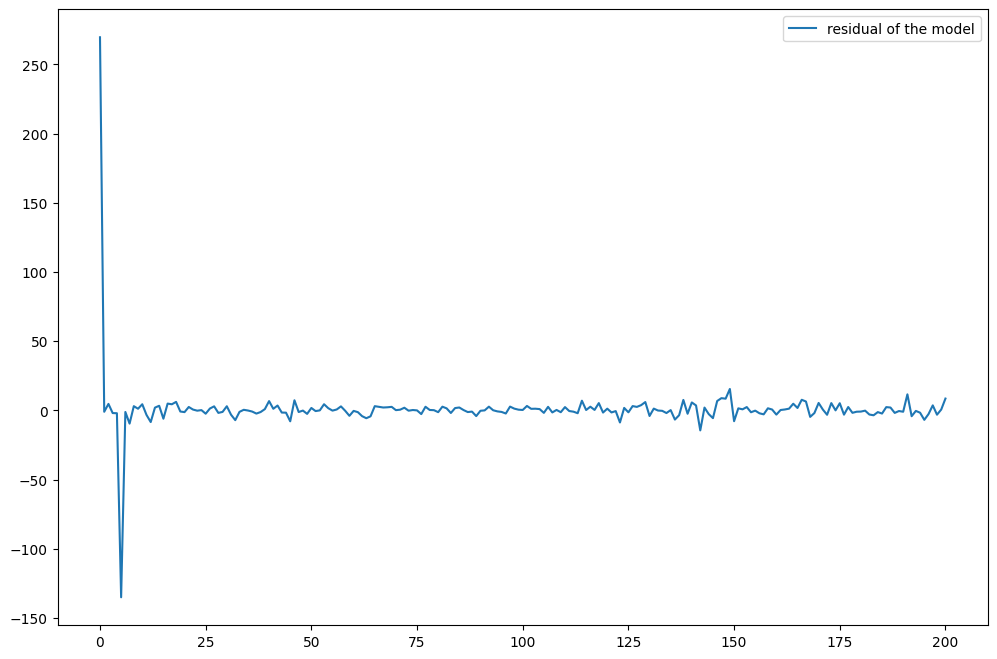


Residual against normal distribution comparison image


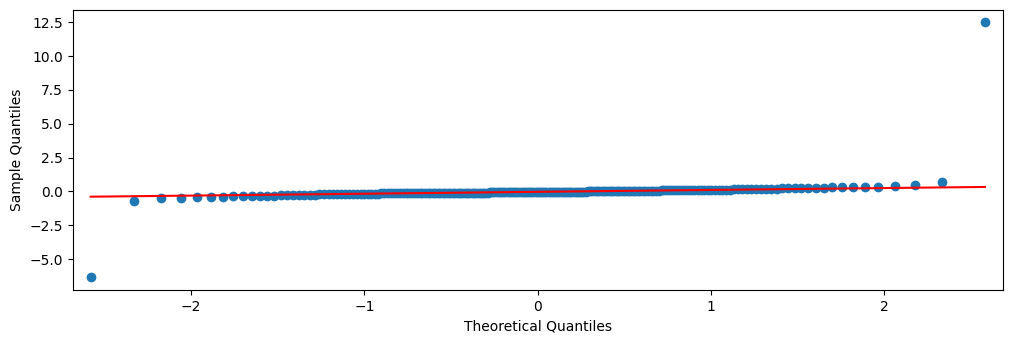

In [245]:


fig = plt.figure(figsize=(12, 8))
plt.plot(arma_model.resid,label='residual of the model')
plt.legend()
plt.show()
print("\nResidual against normal distribution comparison image")
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(211)
fig = qqplot(arma_model.resid, line="q", ax=ax, fit=True)

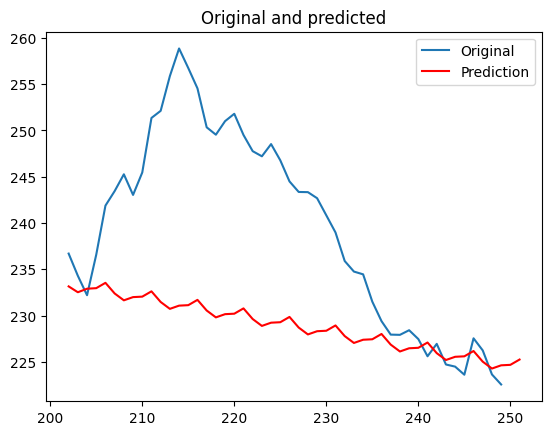

In [246]:

#finally, predictions from model

predict_price = arma_model.predict(202,251) 

fig = plt.figure()
plt.plot(test_segment,label='Original')
plt.plot(predict_price,'r', label='Prediction')
plt.title("Original and predicted")
plt.legend()
plt.show()



### Exercise 2

Although the prediction doesn't fit the original signal perfectly, the general shape is still very well-represented (as did the examples in the lecture slides).

In [141]:

import pickle
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.api import qqplot
import pandas as pd


In [142]:
with open("Nepal_electricity_consumption_in_MWh.pkl", "rb") as f:
    nepal = pickle.load(f)


nepal = nepal.sort_index()
nepal = nepal["Load"]



C:\Users\haina\AppData\Local\Temp\ipykernel_13964\3699265281.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  nepal = pickle.load(f)


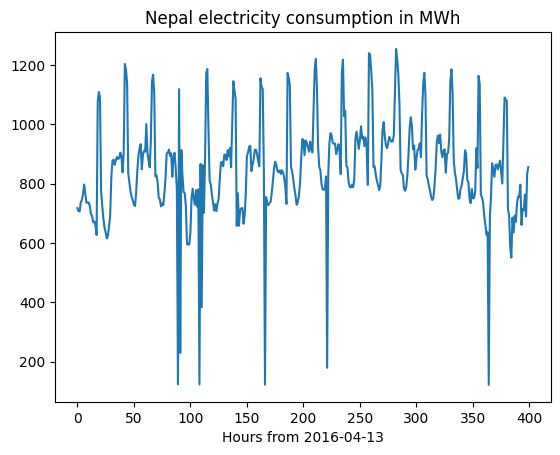

In [143]:
z_score=3 #equal to 3-sigma i.e. ~99% of the data
len_segment=400
reference=z_score/np.sqrt(len_segment)

segment = nepal[0:len_segment]
test_segment = nepal[len_segment+1:500]

fig, ax = plt.subplots()
ax.set_title("Nepal electricity consumption in MWh")
ax.set_xlabel("Hours from 2016-04-13")
ax.plot(segment)



plt.show()

In [144]:
print("\nLet us find the d (differencing) value, the first one that goes below 0.05 limit:")
result = adfuller(segment)
print('p-value (0.05): ', result[1])
result = adfuller(segment.diff().dropna())
print('1st order diff p-value (0.05): ', result[1])


print("No diff, p-value is already less than 0.05, so choose d as 0")


Let us find the d (differencing) value, the first one that goes below 0.05 limit:
p-value (0.05):  3.16684115508428e-05
1st order diff p-value (0.05):  2.475603503788346e-14
No diff, p-value is already less than 0.05, so choose d as 0


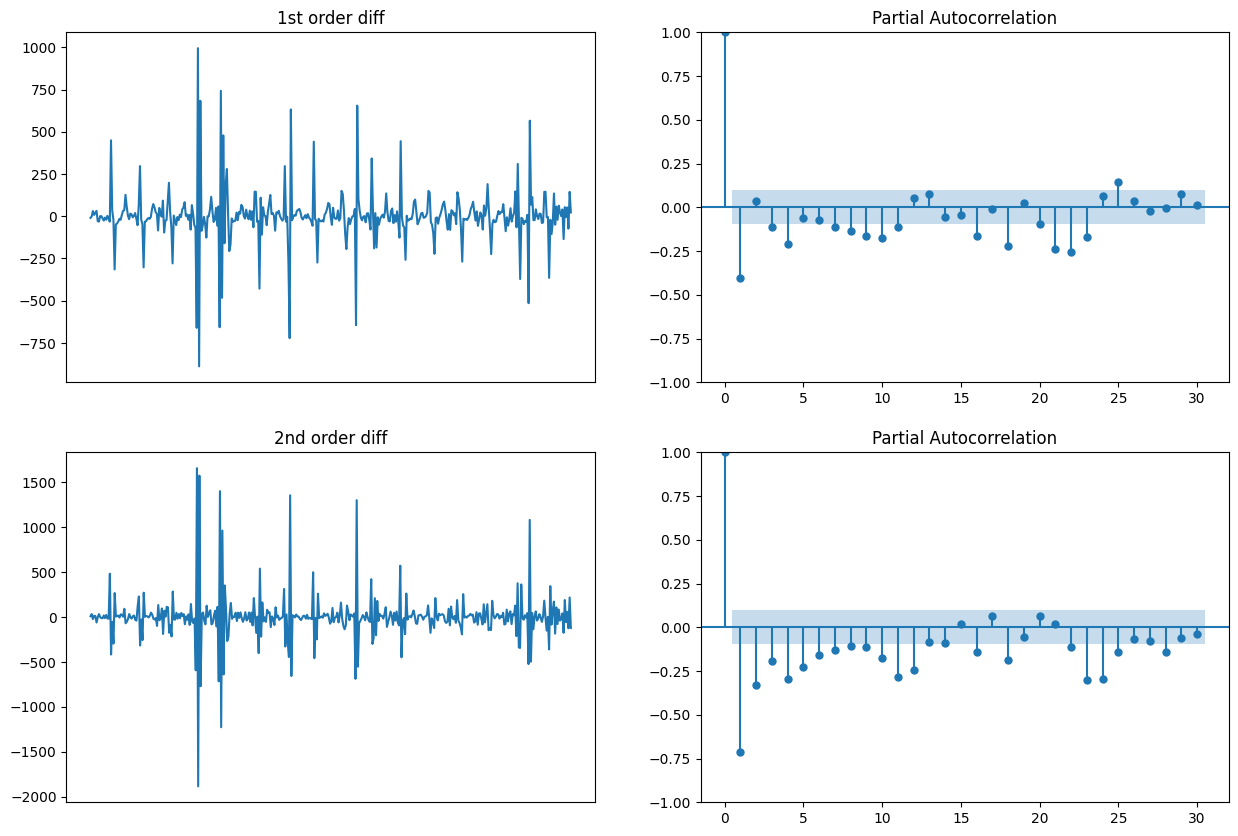

For both plots, the first lag is the most important, so p = 1


In [145]:
#CHOOSING P 
#Look at partial autocorrelation plots of orders of differences
#Choose lag with consistently the largest difference
fig, sub = plt.subplots(2, 2)
sub = sub.flatten()

fig.set_figheight(10)
fig.set_figwidth(15)

ax1 = sub[0]
ax2 = sub[1]
ax3 = sub[2]
ax4 = sub[3]

ax1.set_title("1st order diff")
ax1.plot(segment.diff())
ax1.set_xticks([])
sm.graphics.tsa.plot_pacf(segment.diff().dropna(), lags=30, ax=ax2)

ax3.set_title("2nd order diff")
ax3.plot(segment.diff().diff())
ax3.set_xticks([])
sm.graphics.tsa.plot_pacf(segment.diff().diff().dropna(), lags=30, ax=ax4)

plt.show()

print("For both plots, the first lag is the most important, so p = 1")

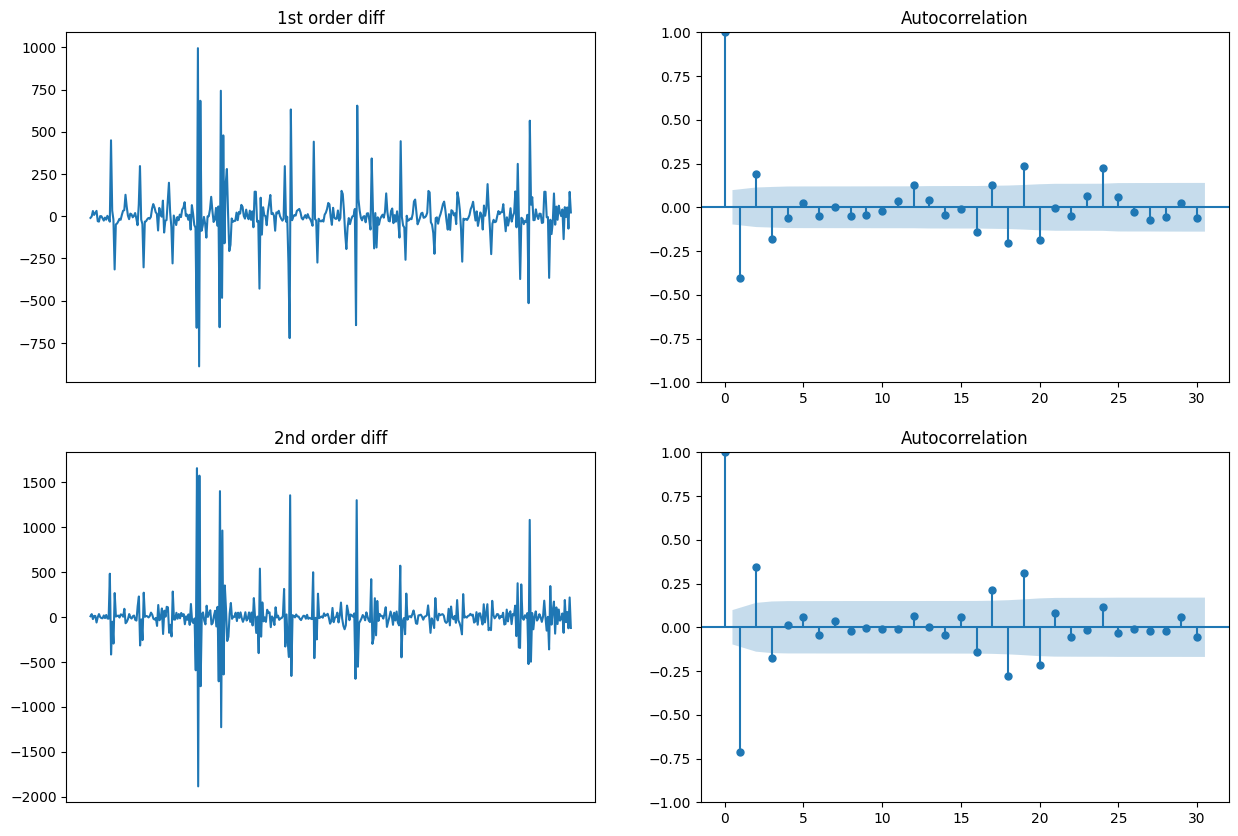

2nd order difference has more 'crossings', so we choose q = 2


In [146]:
#CHOOSING Q
#Look at autocorrelation plots of orders of differences
#Choose number the same as the order of autocorrelation plot with the most "crossings" with x-axis between points
fig, sub = plt.subplots(2, 2)
sub = sub.flatten()

fig.set_figheight(10)
fig.set_figwidth(15)

ax1 = sub[0]
ax2 = sub[1]
ax3 = sub[2]
ax4 = sub[3]



ax1.set_title("1st order diff")
ax1.plot(segment.diff())
ax1.set_xticks([])
sm.graphics.tsa.plot_acf(segment.diff().dropna(), lags=30, ax=ax2)

ax3.set_title("2nd order diff")
ax3.plot(segment.diff().diff())
ax3.set_xticks([])
sm.graphics.tsa.plot_acf(segment.diff().diff().dropna(), lags=30, ax=ax4)
plt.show()


print("2nd order difference has more 'crossings', so we choose q = 2")

In [147]:
period = 24
arma_model=ARIMA(segment,order=(0,1,2),seasonal_order=(0,1,1,period)).fit()

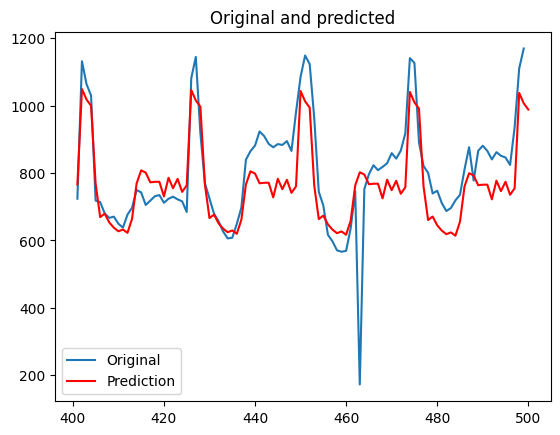

In [148]:

#finally, predictions from model

predict = arma_model.predict(401,500) 

fig = plt.figure()
plt.plot(test_segment,label='Original')
plt.plot(predict,'r', label='Prediction')
plt.title("Original and predicted")
plt.legend()
plt.show()

